<a href="https://colab.research.google.com/github/topeli/GP-2/blob/main/%D0%93%D0%9F_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Парсинг Winline

In [ ]:
!pip install selenium
!pip install webdriver-manager
!apt-get update
!apt install -y chromium-chromedriver

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 512.0/512.0 kB 12.3 MB/s eta 0:00:00
Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:2 https://cli.github.com/packages stable InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [2,125 kB]
Get:9 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [3,528 kB]
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,827 kB]
Get:11 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu

In [ ]:
import requests
import json
from bs4 import BeautifulSoup
from selenium import webdriver as wd
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
import time
from tqdm import tqdm

In [ ]:
url_main = 'https://winline.ru/'
page_main = requests.get(url_main)
page_main.encoding = 'utf-8'
soup_main = BeautifulSoup(page_main.text, 'html.parser')
sports = []
for link in soup_main.find_all('a'):
  if link.get('href').startswith('/stavki/sport'):
    sport = link.get('href').split('/')
    sports.append(sport[3])
del sports[9]
del sports[9]
sports

['futbol',
 'tennis',
 'basketbol',
 'xokkej',
 'gandbol',
 'volejbol',
 'bejsbol',
 'regbi',
 'futzal',
 'golijf',
 'vodnoe_polo',
 'darts',
 'kerling',
 'pesapallo',
 'plyazhnyj_volejbol',
 'plyazhnyj_futbol',
 'snuker',
 'florbol',
 'badminton',
 'nastolijnyj_tennis']

In [ ]:
options = Options()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument("start-maximized")

browser = wd.Chrome(options=options)


SessionNotCreatedException: Message: session not created: Chrome instance exited. Examine ChromeDriver verbose log to determine the cause.; For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#sessionnotcreatedexception
Stacktrace:
#0 0x5a6fcd03d32a <unknown>
#1 0x5a6fcca89e4b <unknown>
#2 0x5a6fccac4919 <unknown>
#3 0x5a6fccac0375 <unknown>
#4 0x5a6fccb11016 <unknown>
#5 0x5a6fccb10736 <unknown>
#6 0x5a6fccacec1a <unknown>
#7 0x5a6fccacf921 <unknown>
#8 0x5a6fcd004239 <unknown>
#9 0x5a6fcd0071e8 <unknown>
#10 0x5a6fccfed4c9 <unknown>
#11 0x5a6fcd007db5 <unknown>
#12 0x5a6fccfd4e93 <unknown>
#13 0x5a6fcd02a098 <unknown>
#14 0x5a6fcd02a273 <unknown>
#15 0x5a6fcd03c2c3 <unknown>
#16 0x7bf48cde9ac3 <unknown>


In [ ]:
browser.get('https://winline.ru/stavki/sport/kriket')
time.sleep(3)
soup = BeautifulSoup(browser.page_source, 'lxml')
print(soup.prettify())

NameError: name 'browser' is not defined

In [ ]:
browser.get('https://winline.ru/stavki/sport/regbi')
time.sleep(3)
soup = BeautifulSoup(browser.page_source, 'lxml')
print(soup.prettify())

In [ ]:
browser.get('https://winline.ru/stavki/sport/regbi')
time.sleep(3)
soup = BeautifulSoup(browser.page_source, 'lxml')
# print(soup.prettify())
# soup.find_all('div', {'class': 'card ng-star-inserted'})[4].find('div', {'class': 'card__body'}).find_all('span', {'class': 'ng-star-inserted'})
soup.find('div', 'block-sport-header__title')

In [ ]:
countries = ['rossiya', 'angliya', 'ispaniya', 'italiya', 'germaniya', 'francziya',
             'niderlandy', 'portugaliya', 'mezhdunarodnye_%28kluby%29', 'mezhdunarodnye',
             'avstraliya', 'argentina', 'belarusij', 'belijgiya', 'braziliya', 'kitaj',
             'ssha', 'turcziya', 'yuzhnaya_koreya', 'yaponiya', 'avstriya', 'bolgariya',
             'boliviya', 'vijetnam', 'grecziya', 'daniya', 'izrailij', 'keniya',
             'kipr', 'kolumbiya', 'norvegiya', 'paragvaj', 'polijsha', 'rumyniya',
             'saudovskaya_araviya', 'severnaya_irlandiya', 'severnaya_makedoniya',
             'singapur', 'urugvaj', 'uehlijs', 'chili', 'shvejczariya', 'ehkvador']

res = []
for c in tqdm(countries):
  browser.get(f'https://winline.ru/stavki/sport/futbol/{c}')
  time.sleep(5)
  soup = BeautifulSoup(browser.page_source, 'lxml')
  sport = 'Футбол'
  blocks = soup.find_all('div', {'class': 'block-sport__champ-item ng-star-inserted'})
  for block in blocks:
    turnir = block.find('span', {'class': 'block-tournament-header__title'}).text.strip()
    players = block.find_all('div', {'class': 'name ng-star-inserted'})
    t = block.find_all('div', {'class': 'header-left__time ng-star-inserted'})
    coefs = block.find('div', {'class': 'card__body'}).find_all('span', {'class': 'ng-star-inserted'})
    if len(coefs) == 8:
      coefs.insert(1, '-')
    else:
      coefs[1] = coefs[1].text.strip()
    t1 = []
    for i in t:
      t1.append(i.text.strip())
    sl = {'sport': sport, 'Tournament': turnir, 'Player 1': players[0].text.strip(),
    'Player 2': players[1].text.strip(),
    'Time': ' '.join(t1),
    '1 wins': coefs[0].text.strip(), 'Draw': coefs[1], '2 wins': coefs[2].text.strip()}
    res.append(sl)
res

In [ ]:
countries = ['atp', 'chellendzher_%28m%29', 'utr_%28zh%29', 'utr_%28m%29']

for c in tqdm(countries):
  browser.get(f'https://winline.ru/stavki/sport/tennis/{c}')
  time.sleep(5)
  soup = BeautifulSoup(browser.page_source, 'lxml')
  sport = 'Теннис'
  blocks = soup.find_all('div', {'class': 'block-sport__champ-item ng-star-inserted'})
  for block in blocks:
    turnir = block.find('span', {'class': 'block-tournament-header__title'}).text.strip()
    players = block.find_all('div', {'class': 'name ng-star-inserted'})
    t = block.find_all('div', {'class': 'header-left__time ng-star-inserted'})
    coefs = block.find('div', {'class': 'card__body'}).find_all('span', {'class': 'ng-star-inserted'})
    if len(coefs) == 8:
      coefs.insert(1, '-')
    else:
      coefs[1] = coefs[1].text.strip()
    t1 = []
    for i in t:
      t1.append(i.text.strip())
    sl = {'sport': sport, 'Tournament': turnir, 'Player 1': players[0].text.strip(),
    'Player 2': players[1].text.strip(),
    'Time': ' '.join(t1),
    '1 wins': coefs[0].text.strip(), 'Draw': coefs[1], '2 wins': coefs[2].text.strip()}
    res.append(sl)
res

In [ ]:
countries = ['rossiya', 'ssha', 'evropa', 'mezhdunarodnye', 'avstraliya',
             'braziliya', 'kitaj', 'argentina', 'germaniya', 'izrailij',
             'kosovo', 'meksika', 'polijsha', 'rumyniya', 'sloveniya',
             'urugvaj', 'francziya']

for c in tqdm(countries):
  browser.get(f'https://winline.ru/stavki/sport/basketbol/{c}')
  time.sleep(5)
  soup = BeautifulSoup(browser.page_source, 'lxml')
  sport = 'Баскетбол'
  blocks = soup.find_all('div', {'class': 'block-sport__champ-item ng-star-inserted'})
  for block in blocks:
    turnir = block.find('span', {'class': 'block-tournament-header__title'}).text.strip()
    players = block.find_all('div', {'class': 'name ng-star-inserted'})
    t = block.find_all('div', {'class': 'header-left__time ng-star-inserted'})
    coefs = block.find('div', {'class': 'card__body'}).find_all('span', {'class': 'ng-star-inserted'})
    if len(coefs) == 8:
      coefs.insert(1, '-')
    else:
      coefs[1] = coefs[1].text.strip()
    t1 = []
    for i in t:
      t1.append(i.text.strip())
    sl = {'sport': sport, 'Tournament': turnir, 'Player 1': players[0].text.strip(),
    'Player 2': players[1].text.strip(),
    'Time': ' '.join(t1),
    '1 wins': coefs[0].text.strip(), 'Draw': coefs[1], '2 wins': coefs[2].text.strip()}
    res.append(sl)
res

In [ ]:
options = Options()
options.add_argument('--headless')
options.add_argument('--no-sandbox')

browser = wd.Chrome(options=options)

for s in tqdm(sports):
  try:
    browser.get(f'https://winline.ru/stavki/sport/{s}')
    time.sleep(7)
    soup = BeautifulSoup(browser.page_source, 'lxml')
    sport = soup.find('div', {'class': 'block-sport-header__title'}).text.strip()
    blocks = soup.find_all('div', {'class': 'block-sport__champ-item ng-star-inserted'})
    for block in blocks:
      turnir = block.find('span', {'class': 'block-tournament-header__title'}).text.strip()
      mathes = block.find_all('div', {'class': 'card ng-star-inserted'})
      for m in mathes:
        players = m.find_all('div', {'class': 'name ng-star-inserted'})
        t = m.find_all('div', {'class': 'header-left__time ng-star-inserted'})
        coefs = m.find('div', {'class': 'card__body'}).find_all('span', {'class': 'ng-star-inserted'})
        if len(coefs) == 8:
          coefs.insert(1, '-')
        else:
          coefs[1] = coefs[1].text.strip()
        t1 = []
        for i in t:
          t1.append(i.text.strip())
        sl = {'sport': sport, 'Tournament': turnir, 'Player 1': players[0].text.strip(),
        'Player 2': players[1].text.strip(),
        'Time': ' '.join(t1),
        '1 wins': coefs[0].text.strip(), 'Draw': coefs[1], '2 wins': coefs[2].text.strip()}
        res.append(sl)

  except AttributeError:
    browser.get(f'https://winline.ru/stavki/sport/{s}')
    res = []
    for i in range(50):
      browser.execute_script("window.scrollBy(0, 500)")
      time.sleep(0.1)
    time.sleep(5)
    soup = BeautifulSoup(browser.page_source, 'lxml')
    sport = soup.find('div', {'class': 'block-sport-header__title'}).text.strip()
    blocks = soup.find_all('div', {'class': 'block-sport__champ-item ng-star-inserted'})
    for block in blocks:
      turnir = block.find('span', {'class': 'block-tournament-header__title'}).text.strip()
      mathes = block.find_all('div', {'class': 'card card--live ng-star-inserted'})
      for m in mathes:
        players = m.find_all('div', {'class': 'name ng-star-inserted'})
        t = m.find_all('div', {'class': 'header-left__time ng-star-inserted'})
        coefs = m.find('div', {'class': 'card__body'}).find_all('span', {'class': 'ng-star-inserted'})
        if len(coefs) == 8:
          coefs.insert(1, '-')
        else:
          coefs[1] = coefs[1].text.strip()
        t1 = []
        for i in t:
          t1.append(i.text.strip())
        sl = {'sport': sport, 'Tournament': turnir, 'Player 1': players[0].text.strip(),
        'Player 2': players[1].text.strip(),
        'Time': ' '.join(t1),
        '1 wins': coefs[0].text.strip(), 'Draw': coefs[1], '2 wins': coefs[2].text.strip()}
        res.append(sl)

res

In [ ]:
import pandas as pd
winline = pd.DataFrame(res)
winline['sport'].value_counts()

In [ ]:
winline.drop_duplicates()

In [ ]:
winline.to_csv('winline.csv', index=False)

# API

In [ ]:
import requests

In [ ]:
response = requests.get("https://api.api-sport.ru/v2/sport",
    headers={
      "Authorization": "35e2234d-d19b-4c0f-8970-070c342347e5"
    }
)

In [ ]:
response.status_code

401

In [ ]:
import json

sports = json.loads(response.content)

In [ ]:
sports

{'code': 401, 'error': 'Unauthorized', 'message': 'Unauthorized'}

In [ ]:
matches = requests.get(
    "https://api.api-sport.ru/v2/football/matches",
    headers={
      "Authorization": "35e2234d-d19b-4c0f-8970-070c342347e5"},
      params={ "date": "2025-11-07"}
)

In [ ]:
matches_content = json.loads(matches.content)

In [ ]:
matches_content['matches'][0] # 14283210

KeyError: 'matches'

In [ ]:
match_data = requests.get(
    "https://api.api-sport.ru/v2/football/matches/14283210",
    headers={
      "Authorization": "35e2234d-d19b-4c0f-8970-070c342347e5"
    }
)
match_data.content

b'{"code":401,"error":"Unauthorized","message":"Unauthorized"}'

In [ ]:
import requests
import pandas as pd
from datetime import datetime, timedelta
import time
def get_sports():
    response = requests.get(f"{"https://api.api-sport.ru/v2"}/sport", headers={"Authorization":"e5a439f6-0dea-4284-baf2-510fe12219ac"})
    return response.json()
def get_matches_by_date(date, sport="football"):
    response = requests.get(f"{"https://api.api-sport.ru/v2"}/{sport}/matches",headers={"Authorization":"e5a439f6-0dea-4284-baf2-510fe12219ac"},params={"date": date},timeout=10)
    return response.json()
sports_data = get_sports()
sports = []
for sport in sports_data:
    sports.append({'slug': sport['slug'],'name': sport['name'],'russian_name': sport.get('translations', {}).get('ru', sport['name'])})
dates = [(datetime.now()-timedelta(days=i)).strftime("%Y-%m-%d") for i in range(1, 5)]
all_matches = []
for sport in sports:
    sport_slug = sport['slug']
    sport_name = sport['russian_name']
    count = 0
    print(f"{sport_name}")
    for date in dates:
        print(f"{date}", end=" ")
        data = get_matches_by_date(date, sport_slug)
        if data and 'matches' in data:
            matches = data['matches']
            count += len(matches)
            print(f"{len(matches)} матчей")
            for match in matches:
                match_info = {
                        'sport': sport_name,
                        'id': match.get('id'),
                        'date': match.get('dateEvent'),
                        'start_timestamp': match.get('startTimestamp'),
                        'status': match.get('status'),
                        'tournament_id': match.get('tournament', {}).get('id'),
                        'tournament_name': match.get('tournament', {}).get('name'),
                        'home_team_id': match.get('homeTeam', {}).get('id'),
                        'home_team_name': match.get('homeTeam', {}).get('name'),
                        'away_team_id': match.get('awayTeam', {}).get('id'),
                        'away_team_name': match.get('awayTeam', {}).get('name'),
                        'home_score': match.get('homeScore', {}).get('current'),
                        'away_score': match.get('awayScore', {}).get('current'),
                    }
                all_matches.append(match_info)
        else:
            print("нет данных")
        time.sleep(0.5)
    if count>0:
        print(f"{sport_name}:{count} матчей")
    time.sleep(1)
if all_matches:
    api_data = pd.DataFrame(all_matches)
    api_data.to_csv('all_sports_matches.csv',index=False,encoding='utf-8')
    print(f"Всего записей: {len(api_data)}")
else:
    print("Не удалось получить данные о матчах")

Футбол
2025-11-10 433 матчей
2025-11-09 4000 матчей
2025-11-08 4000 матчей
2025-11-07 902 матчей
Футбол:9335 матчей
Хоккей
2025-11-10 46 матчей
2025-11-09 157 матчей
2025-11-08 220 матчей
2025-11-07 75 матчей
Хоккей:498 матчей
Баскетбол
2025-11-10 167 матчей
2025-11-09 664 матчей
2025-11-08 1027 матчей
2025-11-07 350 матчей
Баскетбол:2208 матчей
Теннис
2025-11-10 135 матчей
2025-11-09 151 матчей
2025-11-08 229 матчей
2025-11-07 310 матчей
Теннис:825 матчей
Настольный теннис
2025-11-10 682 матчей
2025-11-09 639 матчей
2025-11-08 671 матчей
2025-11-07 750 матчей
Настольный теннис:2742 матчей
Киберспорт
2025-11-10 52 матчей
2025-11-09 49 матчей
2025-11-08 61 матчей
2025-11-07 117 матчей
Киберспорт:279 матчей
Всего записей: 15887


In [ ]:
api_data

,sport,id,date,start_timestamp,status,tournament_id,tournament_name,home_team_id,home_team_name,away_team_id,away_team_name,home_score,away_score
0,Футбол,15003811,2025-11-10,1762806600000,finished,25492,Baller League UK,1080585,SDS FC,1138385,FC Rukkas,3,2
1,Футбол,14407147,2025-11-10,1762804800000,finished,25,League Two,69,Cheltenham Town,56,Notts County,1,2
2,Футбол,14069576,2025-11-10,1762804800000,finished,155,Liga Profesional de Fútbol,3205,Gimnasia y Esgrima,3208,Vélez Sarsfield,2,0
3,Футбол,14935679,2025-11-10,1762804800000,finished,406,Liga 1,335557,Asociación Deportiva Tarma,252254,Los Chankas CYC,1,0
4,Футбол,14668193,2025-11-10,1762804800000,finished,11541,"Primera División, Clausura",323510,Sportivo Ameliano,5992,CS 2 de Mayo,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15882,Киберспорт,14915149,2025-11-07,1762498800000,finished,24184,BLAST Slam,508238,MOUZ,366513,Team Spirit,2,1
15883,Киберспорт,15011522,2025-11-07,1762497000000,finished,16163,IEM,364399,Vitality,364378,Astralis,2,1
15884,Киберспорт,15016244,2025-11-07,1762482000000,finished,30682,Circuit X Retake São Paulo,426019,Fluxo,479715,Bounty Hunters Esports,2,1
15885,Киберспорт,15011567,2025-11-07,1762468500000,finished,30682,Circuit X Retake São Paulo,409873,Gaimin Gladiators,479715,Bounty Hunters Esports,1,2


In [ ]:
api_data['away_team_name'].nunique()

12717

# Парсинг BetBoom

In [ ]:
!pip install selenium

Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/commands/install.py", line 447, in run
    conflicts = self._determine_conflicts(to_install)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/commands/install.py", line 578, in _determine_conflicts
    return check_install_conflicts(to_install)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/operations/check.py", line 101, in check_install_conflicts
    package_set, _ = create_package_set_from_installed()
              

KeyboardInterrupt: 

In [ ]:
!apt-get install -y chromium-chromedriver

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
chromium-chromedriver is already the newest version (1:85.0.4183.83-0ubuntu2.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from time import sleep


from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains

In [ ]:
import sys
sys.path.insert(0, '/usr/lib/chromium-browser/chromedriver')


In [ ]:
chrome_options = Options()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
chrome_options.add_argument('--disable-gpu')
chrome_options.add_argument('--remote-debugging-port=9222')

In [ ]:
driver = webdriver.Chrome(options=chrome_options)
driver.maximize_window()

SessionNotCreatedException: Message: session not created: Chrome instance exited. Examine ChromeDriver verbose log to determine the cause.; For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#sessionnotcreatedexception
Stacktrace:
#0 0x598c187a432a <unknown>
#1 0x598c181f0e4b <unknown>
#2 0x598c1822b919 <unknown>
#3 0x598c18227375 <unknown>
#4 0x598c18278016 <unknown>
#5 0x598c18277736 <unknown>
#6 0x598c18235c1a <unknown>
#7 0x598c18236921 <unknown>
#8 0x598c1876b239 <unknown>
#9 0x598c1876e1e8 <unknown>
#10 0x598c187544c9 <unknown>
#11 0x598c1876edb5 <unknown>
#12 0x598c1873be93 <unknown>
#13 0x598c18791098 <unknown>
#14 0x598c18791273 <unknown>
#15 0x598c187a32c3 <unknown>
#16 0x79ee6af22ac3 <unknown>


In [ ]:
#driver.quit()

In [ ]:
BASE_URL = "https://betboom.ru/"

In [ ]:
driver.get(BASE_URL)
#driver.title

NameError: name 'driver' is not defined

In [ ]:
sport_buttons = driver.find_elements(By.CLASS_NAME, "TW")

print(len(sport_buttons))
print(sport_buttons[0].text, sport_buttons[-1].text)

In [ ]:
data_fh = []
data_other = []


event_descr_keys_fh = ['sport_kind', 'league', 'player_1', 'player_2', 'event_time', 'p1_win', 'coef_p1', 'x', 'coef_x', 'p2_win', 'coef_p2', 'add_coef_cnt'] # футбол, хоккей
event_descr_keys_other = ['sport_kind', 'league', 'player_1', 'player_2', 'event_time', 'p1_win', 'coef_p1','p2_win', 'coef_p2', 'add_coef_cnt'] # other

In [ ]:
import time
for button in sport_buttons:
  print(button.text)

  button_element = button.find_element(By.TAG_NAME, 'button')
  driver.execute_script("arguments[0].click();", button_element)

  time.sleep(2)
  events = driver.find_elements(By.CLASS_NAME, "im")
  add_coefs_el = driver.find_elements(By.XPATH, "//span[contains(text(), '+')]/parent::a")

  for event, add_coef_span in zip(events, add_coefs_el):
    data = [button.text] + event.text.split("\n") + [add_coef_span.get_attribute('innerText').split(" ")[1]]

    if button.text in {"Футбол", "Хоккей"}:
      event_dict = dict(zip(event_descr_keys_fh, data))

      data_fh.append(event_dict)
    else:
      event_dict = dict(zip(event_descr_keys_other, data))
      data_other.append(event_dict)

In [ ]:
data_fh_df = pd.DataFrame(data_fh)
data_fh_df

In [ ]:
data_fh_df.to_excel("fh_coefs.xlsx", index=False)

In [ ]:
data_other_df = pd.DataFrame(data_other)
data_other_df

In [ ]:
data_other_df.to_excel("other_sports_coefs.xlsx", index=False)

In [ ]:
import  pandas as pd

data_fh_df = data_fh_df.rename(columns={
    'coef_p2a4d_coef_cnt': 'add_coef_cnt'
})

data_other_df = data_other_df.rename(columns={
    'p1 win': 'p1_win',
    'p2 win': 'p2_win',
    'coef_p2add_coef_cnt': 'add_coef_cnt'
})

data_other_df['x'] = '-'
data_other_df['coef_x'] = '-'

columns_order = ['sport_kind', 'league', 'player_1', 'player_2', 'event_time',
                 'p1_win', 'coef_p1', 'x', 'coef_x', 'p2_win', 'coef_p2', 'add_coef_cnt']

data_fh_df = data_fh_df[columns_order]
data_other_df = data_other_df[columns_order]

combined_df = pd.concat([data_fh_df, data_other_df], ignore_index=True)

print("Объединенная таблица:")
print(combined_df.head(10))
print(f"\nВсего строк: {len(combined_df)}")
combined_df.to_csv('combined_sports_data.csv', index=False, encoding='utf-8')




```
# Выбран кодовый формат
```


```
## Выбран кодовый формат
```


# Парсинг BetCity

In [ ]:
browser.get('https://betcity.ru')
time.sleep(3)
soup = BeautifulSoup(browser.page_source, 'lxml')
print(soup.prettify())

NameError: name 'browser' is not defined

In [ ]:
browser.get('https://betcity.ru/ru/live/soccer')
time.sleep(3)
soup = BeautifulSoup(browser.page_source, 'lxml')
print(soup.prettify())

NameError: name 'browser' is not defined

In [ ]:
browser.get('https://betcity.ru/ru/line/soccer/445')
time.sleep(3)
soup = BeautifulSoup(browser.page_source, 'lxml')
print(soup.prettify())

NameError: name 'browser' is not defined

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
import time

options = webdriver.ChromeOptions()
options.add_argument("--no-sandbox")
options.add_argument('--headless')
options.add_argument("--disable-dev-shm-usage")

driver = webdriver.Chrome(options=options)
driver.get("https://betcity.ru/ru/results?date=2025-11-05")

time.sleep(5)

data = []

sport_blocks = driver.find_elements(By.CLASS_NAME, "results-champ")

for sport_block in sport_blocks:
    sport_name = sport_block.find_element(By.CLASS_NAME, "results-champ__title-text").text

    events = sport_block.find_elements(By.CLASS_NAME, "results-event")

    for event in events:
        time_text = event.find_element(By.CLASS_NAME, "results-event__time").text

        link_elem = event.find_element(By.CLASS_NAME, "results-event__link")
        teams = link_elem.find_element(By.TAG_NAME, "span").text
        link = link_elem.get_attribute("href")

        score_elem = event.find_element(By.CLASS_NAME, "results-event__score")
        main_score = score_elem.find_element(By.TAG_NAME, "b").text

        additional_score = ""
        try:
            additional_score = score_elem.find_element(By.CLASS_NAME, "results-event__score-additional").text
        except:
            pass

        data.append({
            'sport': sport_name,
            'time': time_text,
            'teams': teams,
            'main_score': main_score,
            'additional_score': additional_score,
            'link': link})

driver.quit()

df5 = pd.DataFrame(data)

df5['sport_type'] = df5['sport'].str.split('.').str[0].str.strip()

columns_order = ['sport_type', 'sport', 'time', 'teams', 'main_score', 'additional_score', 'link']
df5 = df5[columns_order]

excel_filename = 'sports_results5.xlsx'
df5.to_excel(excel_filename, index=False, engine='openpyxl')

SessionNotCreatedException: Message: session not created: Chrome instance exited. Examine ChromeDriver verbose log to determine the cause.; For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#sessionnotcreatedexception
Stacktrace:
#0 0x59c275e3032a <unknown>
#1 0x59c27587ce4b <unknown>
#2 0x59c2758b7919 <unknown>
#3 0x59c2758b3375 <unknown>
#4 0x59c275904016 <unknown>
#5 0x59c275903736 <unknown>
#6 0x59c2758c1c1a <unknown>
#7 0x59c2758c2921 <unknown>
#8 0x59c275df7239 <unknown>
#9 0x59c275dfa1e8 <unknown>
#10 0x59c275de04c9 <unknown>
#11 0x59c275dfadb5 <unknown>
#12 0x59c275dc7e93 <unknown>
#13 0x59c275e1d098 <unknown>
#14 0x59c275e1d273 <unknown>
#15 0x59c275e2f2c3 <unknown>
#16 0x7b12c0b3dac3 <unknown>


In [ ]:
options = webdriver.ChromeOptions()
options.add_argument("--no-sandbox")
options.add_argument('--headless')
options.add_argument("--disable-dev-shm-usage")

driver = webdriver.Chrome(options=options)
driver.get("https://betcity.ru/ru/results?date=2025-11-04")

time.sleep(5)

data = []

sport_blocks = driver.find_elements(By.CLASS_NAME, "results-champ")

for sport_block in sport_blocks:

    sport_name = sport_block.find_element(By.CLASS_NAME, "results-champ__title-text").text

    events = sport_block.find_elements(By.CLASS_NAME, "results-event")

    for event in events:
        time_text = event.find_element(By.CLASS_NAME, "results-event__time").text

        link_elem = event.find_element(By.CLASS_NAME, "results-event__link")
        teams = link_elem.find_element(By.TAG_NAME, "span").text
        link = link_elem.get_attribute("href")

        score_elem = event.find_element(By.CLASS_NAME, "results-event__score")
        main_score = score_elem.find_element(By.TAG_NAME, "b").text

        additional_score = ""
        try:
            additional_score = score_elem.find_element(By.CLASS_NAME, "results-event__score-additional").text
        except:
            pass

        data.append({
            'sport': sport_name,
            'time': time_text,
            'teams': teams,
            'main_score': main_score,
            'additional_score': additional_score,
            'link': link})

driver.quit()

df4 = pd.DataFrame(data)

df4['sport_type'] = df4['sport'].str.split('.').str[0].str.strip()

columns_order = ['sport_type', 'sport', 'time', 'teams', 'main_score', 'additional_score', 'link']
df4 = df4[columns_order]

excel_filename = 'sports_results4.xlsx'
df4.to_excel(excel_filename, index=False, engine='openpyxl')


SessionNotCreatedException: Message: session not created: Chrome instance exited. Examine ChromeDriver verbose log to determine the cause.; For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#sessionnotcreatedexception
Stacktrace:
#0 0x55a9e282232a <unknown>
#1 0x55a9e226ee4b <unknown>
#2 0x55a9e22a9919 <unknown>
#3 0x55a9e22a5375 <unknown>
#4 0x55a9e22f6016 <unknown>
#5 0x55a9e22f5736 <unknown>
#6 0x55a9e22b3c1a <unknown>
#7 0x55a9e22b4921 <unknown>
#8 0x55a9e27e9239 <unknown>
#9 0x55a9e27ec1e8 <unknown>
#10 0x55a9e27d24c9 <unknown>
#11 0x55a9e27ecdb5 <unknown>
#12 0x55a9e27b9e93 <unknown>
#13 0x55a9e280f098 <unknown>
#14 0x55a9e280f273 <unknown>
#15 0x55a9e28212c3 <unknown>
#16 0x7863312bbac3 <unknown>


## Логирование

In [ ]:
import requests
import pandas as pd
from datetime import datetime, timedelta
import time
import logging
logging.basicConfig(level=logging.INFO, filename="api_log.log", format = "%(asctime)s %(levelname)s %(message)s", force=True, filemode = 'w')
logger = logging.getLogger()
try:
    logger.info("API запущен")
    def get_sports():
        logger.info("Запрос списка видов спорта")
        response = requests.get(f"{"https://api.api-sport.ru/v2"}/sport", headers={"Authorization":"e5a439f6-0dea-4284-baf2-510fe12219ac"})
        return response.json()
    def get_matches_by_date(date, sport="football"):
        logger.info(f"Запрос матчей для {sport} на дату {date}")
        try:
            response = requests.get(f"{"https://api.api-sport.ru/v2"}/{sport}/matches",
                                  headers={"Authorization":"e5a439f6-0dea-4284-baf2-510fe12219ac"},
                                  params={"date": date},
                                  timeout=10)
            return response.json()
        except requests.exceptions.RequestException as e:
            logger.error(f"Ошибка запроса для {sport} на дату {date}:{e}")
            return None
    logger.info("Получение списка видов спорта")
    sports_data = get_sports()
    sports = []
    for sport in sports_data:
        sports.append({
            'slug': sport['slug'],
            'name': sport['name'],
            'russian_name': sport.get('translations', {}).get('ru', sport['name'])
        })
    logger.info(f"видов спорта: {len(sports)}")
    dates = [(datetime.now()-timedelta(days=i)).strftime("%Y-%m-%d") for i in range(1, 5)]
    all_matches = []
    for sport in sports:
        sport_slug = sport['slug']
        sport_name = sport['russian_name']
        count = 0
        logger.info(f"Обработка спорта: {sport_name}")
        for date in dates:
            logger.info(f"Данные для {sport_name} на дату {date}")
            data = get_matches_by_date(date, sport_slug)
            if data and 'matches' in data:
                matches = data['matches']
                count += len(matches)
                logger.info(f"{sport_name} {date}:{len(matches)} матчей")
                for match in matches:
                    match_info = {
                        'sport': sport_name,
                        'id': match.get('id'),
                        'date': match.get('dateEvent'),
                        'start_timestamp': match.get('startTimestamp'),
                        'status': match.get('status'),
                        'tournament_id': match.get('tournament', {}).get('id'),
                        'tournament_name': match.get('tournament', {}).get('name'),
                        'home_team_id': match.get('homeTeam', {}).get('id'),
                        'home_team_name': match.get('homeTeam', {}).get('name'),
                        'away_team_id': match.get('awayTeam', {}).get('id'),
                        'away_team_name': match.get('awayTeam', {}).get('name'),
                        'home_score': match.get('homeScore', {}).get('current'),
                        'away_score': match.get('awayScore', {}).get('current'),
                    }
                    all_matches.append(match_info)
            else:
                logger.warning(f"{sport_name} {date}:нет данных")
            time.sleep(0.5)
        if count > 0:
            logger.info(f"{sport_name}:{count} матчей")
        else:
            logger.info(f"{sport_name}:матчи не найдены")
        time.sleep(1)
    logger.info("Создание датасета")
    if all_matches:
        api_data = pd.DataFrame(all_matches)
        logger.info(f"Создан датасет с {len(api_data)} записями")
        api_data.to_csv('all_sports_matches.csv', index=False, encoding='utf-8')
    else:
        logger.info("Не удалось получить данные о матчах")
except Exception as e:
    logger.error(f"ошибка в работе api: {e}")
finally:
    logger.info("Работа api завершена")

# Соединение датасетов

In [ ]:
import pandas as pd
data1 = pd.read_csv('combined_sports_data.csv')
data2 = pd.read_csv('winline.csv')
data3 = pd.read_csv('all_sports_matches (1).csv')
data4 = pd.read_excel('sports_results05.xlsx')
data5 = pd.read_excel('sports_results04.xlsx')
data1

FileNotFoundError: [Errno 2] No such file or directory: 'combined_sports_data.csv'

In [ ]:
data1 = data1.rename(columns={'sport_kind': 'Sport', 'league': 'Tournament',
                      'player_1': 'Player_1', 'player_2': 'Player_2',
                      'event_time': 'Event_time', 'coef_p1': 'Coef_p1_wins',
                      'coef_x': 'Coef_draw', 'coef_p2': 'Coef_p2_wins'})
data1 = data1.drop('p1_win', axis=1)
data1 = data1.drop('x', axis=1)
data1 = data1.drop('p2_win', axis=1)
data1 = data1.drop('add_coef_cnt', axis=1)
data1['Home_score'] = '-'
data1['Away_score'] = '-'
data1

In [ ]:
data2 = data2.rename(columns={'sport': 'Sport', 'Player 1': 'Player_1',
                              'Player 2': 'Player_2', 'Time': 'Event_time',
                              '1 wins': 'Coef_p1_wins', 'Draw': 'Coef_draw',
                              '2 wins': 'Coef_p2_wins'})
data2['Home_score'] = '-'
data2['Away_score'] = '-'
data2

In [ ]:
data3 = data3.rename(columns={'sport': 'Sport', 'tournament_name': 'Tournament',
                              'home_team_name': 'Player_1', 'away_team_name': 'Player_2',
                              'date': 'Event_time', 'home_score': 'Home_score',
                              'away_score': 'Away_score'})
data3['Coef_p1_wins'] = '-'
data3['Coef_draw'] = '-'
data3['Coef_p2_wins'] = '-'
data3 = data3[['Sport', 'Tournament', 'Player_1', 'Player_2', 'Event_time',
               'Coef_p1_wins', 'Coef_draw', 'Coef_p2_wins', 'Home_score',
               'Away_score']]
data3

In [ ]:
data6 = pd.concat([data4, data5])
data6[['Player_1', 'Player_2']] = data6['teams'].str.split('—', expand=True)
data6[['Home_score', 'Away_score']] = data6['main_score'].str.split(':', expand=True)
data6['Event_time'] = data6['data']
data6 = data6.rename(columns={'sport_type': 'Sport', 'sport': 'Tournament'})
data6['Coef_p1_wins'] = '-'
data6['Coef_p2_wins'] = '-'
data6['Coef_draw'] = '-'
data6 = data6[['Sport', 'Tournament', 'Player_1', 'Player_2', 'Event_time',
               'Coef_p1_wins', 'Coef_draw', 'Coef_p2_wins', 'Home_score',
               'Away_score']]
data6

In [ ]:
data6.to_csv('parsing (one).csv', index=False)

In [ ]:
parsing = pd.concat([data1, data2, data6])
parsing.to_csv('parsing (all).csv', index=False)

In [ ]:
final = pd.concat([data1, data2, data3, data6])
final.to_csv('all.csv', index=False)

In [ ]:
one = pd.concat([data3, data6])
one.to_csv('past_matches.csv', index=False)

In [ ]:
two = pd.concat([data1, data2])
two.to_csv('future_matches.csv', index=False)

In [ ]:
data1.to_csv('betboom_final.csv', index=False)
data2.to_csv('winline_final.csv', index=False)

# EDA

In [ ]:
import pandas as pd

In [ ]:
data_all = pd.read_csv('all.csv')
data_all

,Sport,Tournament,Player_1,Player_2,Event_time,Coef_p1_wins,Coef_draw,Coef_p2_wins,Home_score,Away_score
0,Футбол,Россия. 1-я лига,ФК Челябинск,Уфа,Сегодня в 13:00,2.18,3.05,3.65,-,-
1,Футбол,Россия. 1-я лига,Факел,Спартак Кострома,Сегодня в 16:30,2.09,3.15,3.8,-,-
2,Футбол,BetBoom Матчи Сборной России,Россия,Перу,12 ноября в 17:00,1.81,3.51,4.86,-,-
3,Футбол,ЧМ. Африка. Отборочные матчи,Нигерия,Габон,13 ноября в 16:00,1.78,3.25,5.0,-,-
4,Футбол,ЧМ. Европа. Отборочные матчи,Армения,Венгрия,13 ноября в 17:00,5.2,4.1,1.61,-,-
...,...,...,...,...,...,...,...,...,...,...
32910,Флорбол,Флорбол. Финляндия. Дивизион 1 (до 19 лет).,Блэкбердс (19),ПСС (19),2025-11-04 17:30,-,-,-,9,4
32911,Флорбол,Флорбол. Норвегия. Дивизион 2.,Сент-Круа 2,Фредрикстад,2025-11-04 19:30,-,-,-,4,6
32912,Хоккей на траве,Хоккей на траве. США. NCAA. Женщины.,Луисвилл (ж),Северная Каролина (ж),2025-11-04 15:00,-,-,-,1,2
32913,Хоккей на траве,Хоккей на траве. США. NCAA. Женщины.,Калифорния (ж),Дьюк (ж),2025-11-04 17:30,-,-,-,1,7


In [ ]:
from datetime import datetime
import re
import numpy as np
tr = {'января': '01', 'февраля': '02', 'марта': '03',
        'апреля': '04', 'мая': '05', 'июня': '06',
        'июля': '07', 'августа': '08', 'сентября': '09',
        'октября': '10', 'ноября': '11', 'декабря': '12'}

def func(time):
  h = time.split(' ')
  if len(h) == 1 or '+' in h[0]:
    return np.nan
  if re.match(r'\d\d.\d\d.\d\d', h[0]):
    return datetime.strptime(h[0], '%d.%m.%y').date()
  if h[0] == 'Сегодня':
    return datetime.strptime('10.11.25', '%d.%m.%y').date()
  if h[0] == 'Завтра':
    return datetime.strptime('11.11.25', '%d.%m.%y').date()
  else:
    date = h[0] + '.' + tr[h[1]] + '.25'
    return datetime.strptime(date, '%d.%m.%y').date()

In [ ]:
data_future = pd.read_csv('future_matches.csv')
data_future = data_future.drop('Home_score',axis=1)
data_future = data_future.drop('Away_score',axis=1)
data_future['Event_time'] = data_future['Event_time'].apply(func)
data_future['Event_time'].value_counts()

,count
Event_time,
2025-11-10,145
2025-11-11,57
2025-11-22,41
2025-11-12,37
2025-11-14,28
2025-11-23,23
2025-11-15,21
2025-11-13,20
2025-11-21,17


In [ ]:
data_future_s = data_future.sort_values('Event_time')

In [ ]:
data_future['Coef_draw'] = data_future['Coef_draw'].replace('-', np.nan).replace('—', np.nan)
data_future['Coef_p1_wins'] = data_future['Coef_p1_wins'].replace('-', np.nan).replace('—', np.nan)
data_future['Coef_p2_wins'] = data_future['Coef_p2_wins'].replace('-', np.nan).replace('—', np.nan)
data_future['Coef_p1_wins'] = pd.to_numeric(data_future['Coef_p1_wins'])
data_future['Coef_p2_wins'] = pd.to_numeric(data_future['Coef_p2_wins'], errors='coerce')
data_future['Coef_draw'] = pd.to_numeric(data_future['Coef_draw'])
data_future

,Sport,Tournament,Player_1,Player_2,Event_time,Coef_p1_wins,Coef_draw,Coef_p2_wins
0,Футбол,Россия. 1-я лига,ФК Челябинск,Уфа,2025-11-10,2.18,3.05,3.65
1,Футбол,Россия. 1-я лига,Факел,Спартак Кострома,2025-11-10,2.09,3.15,3.80
2,Футбол,BetBoom Матчи Сборной России,Россия,Перу,2025-11-12,1.81,3.51,4.86
3,Футбол,ЧМ. Африка. Отборочные матчи,Нигерия,Габон,2025-11-13,1.78,3.25,5.00
4,Футбол,ЧМ. Европа. Отборочные матчи,Армения,Венгрия,2025-11-13,5.20,4.10,1.61
...,...,...,...,...,...,...,...,...
443,Пляжный волейбол,Международные | Чемпионат Мира,Карачер И. / Николаидис М.,Эль Гарути С. / Руни Лазар И.,2025-11-14,1.03,NaN,10.00
444,Снукер,Международные | Турнир Чемпионов,Трамп Дж.,Юлу Б.,2025-11-10,1.02,NaN,12.00
445,Снукер,Международные | Турнир Чемпионов,Мерфи Ш.,Пейфан Л.,2025-11-10,1.26,NaN,3.75
446,Снукер,Международные | Турнир Чемпионов,Уилсон К.,Лисовски Д.,2025-11-11,1.66,NaN,2.14


In [ ]:
data_past = pd.read_csv('past_matches (1).csv')
data_past = data_past.drop('Coef_p1_wins',axis=1)
data_past = data_past.drop('Coef_p2_wins',axis=1)
data_past = data_past.drop('Coef_draw',axis=1)
data_past


,Sport,Tournament,Player_1,Player_2,Event_time,Home_score,Away_score
0,Футбол,Women's Super League,London City Lionesses,Tottenham FC,2025-11-09,4,2.0
1,Футбол,Women's Super League,West Ham,Leicester City,2025-11-09,1,1.0
2,Футбол,Women's Super League,Liverpool FC,Brighton,2025-11-09,1,1.0
3,Футбол,FA Women's Championship,Durham W.F.C.,Newcastle United WFC,2025-11-09,1,1.0
4,Футбол,Premier League,Aston Villa,Bournemouth,2025-11-09,4,0.0
...,...,...,...,...,...,...,...
32462,Флорбол,Флорбол. Финляндия. Дивизион 1 (до 19 лет).,Блэкбердс (19),ПСС (19),2025-11-04,9,4.0
32463,Флорбол,Флорбол. Норвегия. Дивизион 2.,Сент-Круа 2,Фредрикстад,2025-11-04,4,6.0
32464,Хоккей на траве,Хоккей на траве. США. NCAA. Женщины.,Луисвилл (ж),Северная Каролина (ж),2025-11-04,1,2.0
32465,Хоккей на траве,Хоккей на траве. США. NCAA. Женщины.,Калифорния (ж),Дьюк (ж),2025-11-04,1,7.0


### Поиск пропусков

In [ ]:
data_past.isna().sum()

,0
Sport,0
Tournament,0
Player_1,0
Player_2,7
Event_time,0
Home_score,1
Away_score,111


In [ ]:
data_past[data_past['Player_2'].isna()]

,Sport,Tournament,Player_1,Player_2,Event_time,Home_score,Away_score
29733,Теннис,Теннис. Итоговый чемпионат WTA. Эр-Рияд. Саудо...,Синякова К./Таунсенд Т.,NaN,2025-11-04,Победитель Да,NaN
30333,Баскетбол,Баскетбол. NBA. Регулярный чемпионат. Бруклин ...,Кол-во минут,NaN,2025-11-04,22,NaN
30334,Баскетбол,Баскетбол. NBA. Регулярный чемпионат. Бруклин ...,Количество 3-х очк. попаданий,NaN,2025-11-04,0,NaN
30335,Баскетбол,Баскетбол. NBA. Регулярный чемпионат. Бруклин ...,Количество блок-шотов,NaN,2025-11-04,1,NaN
30336,Баскетбол,Баскетбол. NBA. Регулярный чемпионат. Бруклин ...,Количество перехватов,NaN,2025-11-04,2,NaN
30337,Баскетбол,Баскетбол. NBA. Регулярный чемпионат. Бруклин ...,Количество потерь,NaN,2025-11-04,2,NaN
30338,Баскетбол,Баскетбол. NBA. Регулярный чемпионат. Бруклин ...,Процент попадания 3-х очк. бросков,NaN,2025-11-04,0,NaN


In [ ]:
data_past = data_past.dropna(subset=['Player_2'])
data_past[data_past['Player_2'].isna()]

,Sport,Tournament,Player_1,Player_2,Event_time,Home_score,Away_score


In [ ]:
data_past[data_past['Home_score'].isna()]


,Sport,Tournament,Player_1,Player_2,Event_time,Home_score,Away_score
24014,Теннис,Теннис. Итоговый чемпионат WTA. Эр-Рияд. Саудо...,Елена Рыбакина,Ига Свёнтек,2025-11-05,NaN,NaN


In [ ]:
data_past = data_past.dropna(subset=['Home_score'])
data_past[data_past['Home_score'].isna()]

,Sport,Tournament,Player_1,Player_2,Event_time,Home_score,Away_score


In [ ]:
data_past[data_past['Away_score'].isna()]

,Sport,Tournament,Player_1,Player_2,Event_time,Home_score,Away_score
22353,Футбол,Футбол. Андорра. Примера Дивизион.,Пас-де-ла-Каса,ФК Санта-Колома,2025-11-05,отмена,NaN
22355,Футбол,Футбол. Аргентина. Лига Чако.,Вилья Альвеар,Дефенсорес Пуэрто Вилелас,2025-11-05,отмена,NaN
22367,Футбол,Футбол. Бразилия. Гаушо. Серия B.,АПАФУТ,Нову Оризонти,2025-11-05,отмена,NaN
22440,Футбол,Футбол. Люксембург. Национальный дивизион.,Дифферданж 03,Роданж,2025-11-05,отмена,NaN
22449,Футбол,Футбол. Малави. Премьер-лига.,Форвард Уондерерс ФК,Эхая,2025-11-05,отмена,NaN
...,...,...,...,...,...,...,...
32369,Бадминтон,Бадминтон. Korea Masters. Женщины. Квалификация.,Тонруг Саэхенг,Ли Со Юл,2025-11-04,отмена,NaN
32372,Бадминтон,Бадминтон. Korea Masters. Женщины. Квалификация.,Ким Чжу Ын,Хан Инсьира,2025-11-04,отмена,NaN
32385,Бадминтон,Бадминтон. Korea Masters. Женщины. Пары.,Ын Со Чжан/Ю Чжун Ким,Джи Ю Чонг/Нг Ванесса,2025-11-04,отмена,NaN
32403,Бейсбол,Бейсбол. Доминиканская Респуб. LIDOM. Регулярн...,Агилас Сибаэнас,Леонес Эскохидо,2025-11-04,отмена,NaN


In [ ]:
data_past = data_past.dropna(subset=['Away_score'])
data_past[data_past['Away_score'].isna()]

,Sport,Tournament,Player_1,Player_2,Event_time,Home_score,Away_score


In [ ]:
data_past.isna().sum()

,0
Sport,0
Tournament,0
Player_1,0
Player_2,0
Event_time,0
Home_score,0
Away_score,0


In [ ]:
data_future.isna().sum()

,0
Sport,0
Tournament,0
Player_1,0
Player_2,0
Event_time,29
Coef_p1_wins,0
Coef_draw,215
Coef_p2_wins,0


In [ ]:
data_future[data_future['Event_time'].isna()]

,Sport,Tournament,Player_1,Player_2,Event_time,Coef_p1_wins,Coef_draw,Coef_p2_wins
130,Киберспорт,Dota 2. CIS Battle 3,Yellow Submarine,Most Wanted,NaN,1,NaN,3-я карта
178,Настольный теннис,TT Cup,Весецки Дэвид,Брожек Михал,NaN,2,NaN,5-й сет
179,Настольный теннис,TT Cup,Стапор Рафал,Колек Мацей,NaN,9,NaN,3-й сет
180,Настольный теннис,TT Cup,Фиала Ян,Кулвейт Йонас,NaN,9,NaN,3-й сет
181,Настольный теннис,TT Elite Series,Косовски Якуб,Спыхала Адриан,NaN,7,NaN,3-й сет
182,Настольный теннис,TT Cup,Сосновски Гжегож,Кабан Якуб,NaN,2,NaN,2-й сет
183,Настольный теннис,TT Elite Series,Глушек Войцех,Пржевлоцки Яцек,NaN,2,NaN,3-й сет
184,Настольный теннис,TT Cup,Ибарра Альберто,Санчес Хуан А.,NaN,1,NaN,2-й сет
185,Настольный теннис,TT Elite Series,Петрашко Лукаш,Муговски Аркадиуш,NaN,8,NaN,1-й сет
187,Настольный теннис,TT Elite Series,Скленски Мирослав,Червинский Бартош,NaN,0,NaN,Не начался


### Поиск дубликатов

In [ ]:
data_past.duplicated().any()

np.True_

In [ ]:
data_past[data_past.duplicated(keep=False)]

,Sport,Tournament,Player_1,Player_2,Event_time,Home_score,Away_score
1196,Футбол,Landesliga Mittelrhein,1. FC Düren II,TuS Chlodwig Zülpich,2025-11-09,0,0.0
1679,Футбол,Landesliga Mittelrhein,1. FC Düren II,TuS Chlodwig Zülpich,2025-11-09,0,0.0
2006,Футбол,Düzce 1. Amatör Ligi,Bahçeköyspor,Düzce Hamidiyespor,2025-11-09,0,0.0
2389,Футбол,Düzce 1. Amatör Ligi,Bahçeköyspor,Düzce Hamidiyespor,2025-11-09,0,0.0
3436,Футбол,LFA First Division,Freeport FC,Gardnersville FC,2025-11-09,0,3.0
...,...,...,...,...,...,...,...
32255,Киберспорт,Киберспорт. CS2. H2H Liga 2x2 (матчи из 1-й ка...,Howl Fighters,Cortex Inc.,2025-11-04,8,9.0
32283,Киберспорт,Киберспорт. CS2. H2H Liga 2x2 (матчи из 1-й ка...,Acid Raccoons,Nightmare Foxes,2025-11-04,9,4.0
32286,Киберспорт,Киберспорт. CS2. H2H Liga 2x2 (матчи из 1-й ка...,Steel Panthers,Acid Raccoons,2025-11-04,9,5.0
32287,Киберспорт,Киберспорт. CS2. H2H Liga 2x2 (матчи из 1-й ка...,Nightmare Foxes,Steel Panthers,2025-11-04,8,9.0


In [ ]:
data_past[data_past.duplicated(keep=False)].tail(10)

,Sport,Tournament,Player_1,Player_2,Event_time,Home_score,Away_score
32239,Киберспорт,Киберспорт. CS2. H2H Liga 2x2 (матчи из 1-й ка...,Howl Fighters,Cortex Inc.,2025-11-04,8,9.0
32245,Киберспорт,Киберспорт. CS2. H2H Liga 2x2 (матчи из 1-й ка...,Cortex Inc.,Howl Fighters,2025-11-04,9,2.0
32249,Киберспорт,Киберспорт. CS2. H2H Liga 2x2 (матчи из 1-й ка...,Cortex Inc.,Howl Fighters,2025-11-04,9,2.0
32250,Киберспорт,Киберспорт. CS2. H2H Liga 2x2 (матчи из 1-й ка...,Howl Fighters,Cortex Inc.,2025-11-04,8,9.0
32254,Киберспорт,Киберспорт. CS2. H2H Liga 2x2 (матчи из 1-й ка...,Cortex Inc.,Blue Gem Keepers,2025-11-04,2,9.0
32255,Киберспорт,Киберспорт. CS2. H2H Liga 2x2 (матчи из 1-й ка...,Howl Fighters,Cortex Inc.,2025-11-04,8,9.0
32283,Киберспорт,Киберспорт. CS2. H2H Liga 2x2 (матчи из 1-й ка...,Acid Raccoons,Nightmare Foxes,2025-11-04,9,4.0
32286,Киберспорт,Киберспорт. CS2. H2H Liga 2x2 (матчи из 1-й ка...,Steel Panthers,Acid Raccoons,2025-11-04,9,5.0
32287,Киберспорт,Киберспорт. CS2. H2H Liga 2x2 (матчи из 1-й ка...,Nightmare Foxes,Steel Panthers,2025-11-04,8,9.0
32290,Киберспорт,Киберспорт. CS2. H2H Liga 2x2 (матчи из 1-й ка...,Acid Raccoons,Nightmare Foxes,2025-11-04,9,4.0


В киберспорте дубликатов нет, так как это записи о двух игироках. Игры 2 на 2, в одной команде 2 игрока и для каждого есть ирнформация

In [ ]:
data_past[data_past.duplicated(keep=False)].head(10)

,Sport,Tournament,Player_1,Player_2,Event_time,Home_score,Away_score
1196,Футбол,Landesliga Mittelrhein,1. FC Düren II,TuS Chlodwig Zülpich,2025-11-09,0,0.0
1679,Футбол,Landesliga Mittelrhein,1. FC Düren II,TuS Chlodwig Zülpich,2025-11-09,0,0.0
2006,Футбол,Düzce 1. Amatör Ligi,Bahçeköyspor,Düzce Hamidiyespor,2025-11-09,0,0.0
2389,Футбол,Düzce 1. Amatör Ligi,Bahçeköyspor,Düzce Hamidiyespor,2025-11-09,0,0.0
3436,Футбол,LFA First Division,Freeport FC,Gardnersville FC,2025-11-09,0,3.0
3437,Футбол,LFA First Division,LISCR FC,LPRC Oilers FC,2025-11-09,1,0.0
3443,Футбол,LFA First Division,Freeport FC,Gardnersville FC,2025-11-09,0,3.0
3444,Футбол,LFA First Division,LISCR FC,LPRC Oilers FC,2025-11-09,1,0.0
3598,Футбол,2. ŽNL Istarska,NK Cement Koromačno,NK Raša 1938,2025-11-09,0,1.0
3710,Футбол,1. ŽNL Istarska,NK Arne Peruški,NK Brtonigla-Nova Vas,2025-11-09,3,1.0


In [ ]:
data_past = data_past.drop_duplicates()

In [ ]:
data_future.duplicated().any()

np.False_

In [ ]:
data_past['Away_score'] = data_past['Away_score'].astype('int')
data_past

,Sport,Tournament,Player_1,Player_2,Event_time,Home_score,Away_score
0,Футбол,Women's Super League,London City Lionesses,Tottenham FC,2025-11-09,4,2
1,Футбол,Women's Super League,West Ham,Leicester City,2025-11-09,1,1
2,Футбол,Women's Super League,Liverpool FC,Brighton,2025-11-09,1,1
3,Футбол,FA Women's Championship,Durham W.F.C.,Newcastle United WFC,2025-11-09,1,1
4,Футбол,Premier League,Aston Villa,Bournemouth,2025-11-09,4,0
...,...,...,...,...,...,...,...
32462,Флорбол,Флорбол. Финляндия. Дивизион 1 (до 19 лет).,Блэкбердс (19),ПСС (19),2025-11-04,9,4
32463,Флорбол,Флорбол. Норвегия. Дивизион 2.,Сент-Круа 2,Фредрикстад,2025-11-04,4,6
32464,Хоккей на траве,Хоккей на траве. США. NCAA. Женщины.,Луисвилл (ж),Северная Каролина (ж),2025-11-04,1,2
32465,Хоккей на траве,Хоккей на траве. США. NCAA. Женщины.,Калифорния (ж),Дьюк (ж),2025-11-04,1,7


### Анализ

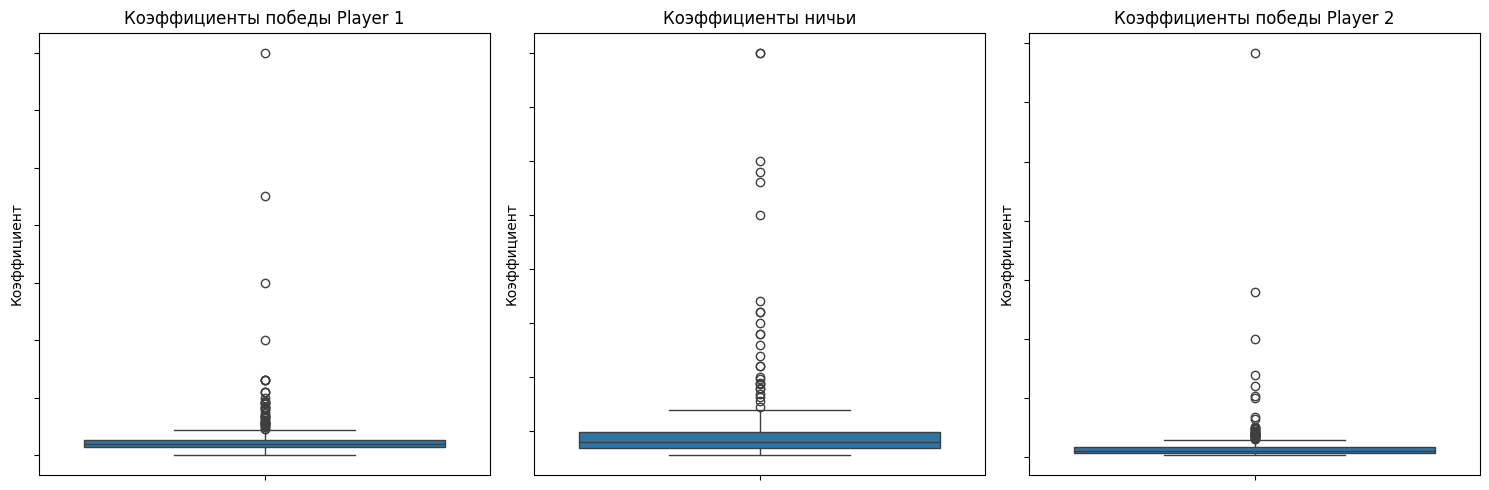

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(data_future, y='Coef_p1_wins', ax=axes[0])
axes[0].set_title('Коэффициенты победы Player 1')
axes[0].set_ylabel('Коэффициент')
axes[0].set_yticklabels([])
sns.boxplot(data_future, y='Coef_draw', ax=axes[1])
axes[1].set_title('Коэффициенты ничьи')
axes[1].set_ylabel('Коэффициент')
axes[1].set_yticklabels([])
sns.boxplot(data_future, y='Coef_p2_wins', ax=axes[2])
axes[2].set_title('Коэффициенты победы Player 2')
axes[2].set_ylabel('Коэффициент')
axes[2].set_yticklabels([])
plt.tight_layout()
plt.show()

In [ ]:
data_future['Coef_p1_wins'].describe()

,Coef_p1_wins
count,444.000000
mean,2.814932
std,4.521623
min,0.000000
25%,1.440000
50%,1.930000
75%,2.650000
max,70.000000


In [ ]:
data_future[data_future['Coef_p1_wins'] == 70]

,Sport,Tournament,Player_1,Player_2,Event_time,Coef_p1_wins,Coef_draw,Coef_p2_wins
21,Футбол,ЧМ. Европа. Отборочные матчи,Лихтенштейн,Уэльс,2025-11-15,70.0,16.0,1.02


In [ ]:
data_future[data_future['Coef_p1_wins'] == 0]

,Sport,Tournament,Player_1,Player_2,Event_time,Coef_p1_wins,Coef_draw,Coef_p2_wins
187,Настольный теннис,TT Elite Series,Скленски Мирослав,Червинский Бартош,NaN,0.0,NaN,Не начался
188,Настольный теннис,TT Elite Series,Виховски Гжегож,Винченец Оливер,NaN,0.0,NaN,Не начался
239,Волейбол,Беларусь. Лига про,Империя-про,Энерджи-про,NaN,0.0,NaN,1-й сет


In [ ]:
data_future['Coef_p2_wins'].describe()

,Coef_p2_wins
count,434.000000
mean,4.332373
std,9.578527
min,1.020000
25%,1.842500
50%,2.650000
75%,4.200000
max,171.000000


In [ ]:
data_future[data_future['Coef_p2_wins'] == 171]

,Sport,Tournament,Player_1,Player_2,Event_time,Coef_p1_wins,Coef_draw,Coef_p2_wins
163,Баскетбол,Единая Лига ВТБ,УНИКС,Самара,2025-11-11,NaN,NaN,171.0


In [ ]:
data_future['Coef_draw'].describe()

,Coef_draw
count,233.000000
mean,5.428326
std,5.037998
min,2.800000
25%,3.480000
50%,3.970000
75%,4.900000
max,40.000000


In [ ]:
coef= ['Coef_p1_wins', 'Coef_draw', 'Coef_p2_wins', 'Tournament']
data_without_coef = data_future.drop(columns=coef)
data_without_coef

,Sport,Player_1,Player_2,Event_time
0,Футбол,ФК Челябинск,Уфа,2025-11-10
219,Настольный теннис,Беран Матей,Фиала Ян,2025-11-10
221,Настольный теннис,Виховски Гжегож,Витчак Филип,2025-11-10
222,Настольный теннис,Влошко Кшиштоф,Мястовски Максимилиан,2025-11-10
223,Настольный теннис,Котыль Кшиштоф,Сухецкий Вацлав,2025-11-10
...,...,...,...,...
354,Баскетбол,Санкт-Петербург,Сочи,NaN
355,Баскетбол,Мэд Антс,Драйв,NaN
356,Баскетбол,Бульдогс (ж),Шаркс (ж),NaN
363,Баскетбол,Аллигаторс,Тайгерс,NaN


In [ ]:
dubl = data_without_coef.duplicated(keep=False).reset_index(name='is_dubl')
dubl

,index,is_dubl
0,0,False
1,1,False
2,2,True
3,3,False
4,4,False
...,...,...
443,443,False
444,444,False
445,445,False
446,446,False


In [ ]:
dubl['is_dubl'].value_counts()

,count
is_dubl,
False,432
True,16


In [ ]:
with_dubl = data_future.reset_index().merge(dubl, on='index', how='inner')
peres = with_dubl[with_dubl['is_dubl'] == np.bool_(True)]
peres

,index,Sport,Tournament,Player_1,Player_2,Event_time,Coef_p1_wins,Coef_draw,Coef_p2_wins,is_dubl
2,2,Футбол,BetBoom Матчи Сборной России,Россия,Перу,2025-11-12,1.81,3.51,4.86,True
5,5,Футбол,ЧМ. Европа. Отборочные матчи,Азербайджан,Исландия,2025-11-13,5.8,4.2,1.54,True
33,33,Футбол,Франция. Лига 1,Ницца,Марсель,2025-11-21,3.82,3.87,1.91,True
40,40,Футбол,Италия. Серия A,Удинезе,Болонья,2025-11-22,3.63,3.33,2.14,True
42,42,Футбол,Германия. Бундеслига,Вольфсбург,Байер Л,2025-11-22,3.12,3.83,2.16,True
88,88,Футбол,Лига Чемпионов УЕФА,Аякс,Бенфика,2025-11-25,3.49,3.85,2.03,True
154,154,Баскетбол,NBA,Шарлотт,Л-А Лейкерс,2025-11-11,3.65,NaN,1.27,True
164,164,Баскетбол,Евролига,Дубай,Црвена Звезда,2025-11-11,1.79,NaN,1.96,True
270,270,Футбол,Италия | Серия A,Удинезе,Болонья,2025-11-22,3.60,3.20,2.08,True
275,275,Футбол,Германия | Бундеслига,Вольфсбург,Байер Л,2025-11-22,3.05,3.65,2.15,True


In [ ]:
bb = peres.iloc[:8, :]
wl = peres.iloc[8:, :]
together = bb.merge(wl[['Player_1', 'Player_2', 'Coef_p1_wins',	'Coef_draw',
                        'Coef_p2_wins']], on=['Player_1', 'Player_2'], how='inner')
together

,index,Sport,Tournament,Player_1,Player_2,Event_time,Coef_p1_wins_x,Coef_draw_x,Coef_p2_wins_x,is_dubl,Coef_p1_wins_y,Coef_draw_y,Coef_p2_wins_y
0,2,Футбол,BetBoom Матчи Сборной России,Россия,Перу,2025-11-12,1.81,3.51,4.86,True,1.75,3.30,4.80
1,5,Футбол,ЧМ. Европа. Отборочные матчи,Азербайджан,Исландия,2025-11-13,5.8,4.2,1.54,True,5.60,4.20,1.53
2,33,Футбол,Франция. Лига 1,Ницца,Марсель,2025-11-21,3.82,3.87,1.91,True,3.60,3.70,1.92
3,40,Футбол,Италия. Серия A,Удинезе,Болонья,2025-11-22,3.63,3.33,2.14,True,3.60,3.20,2.08
4,42,Футбол,Германия. Бундеслига,Вольфсбург,Байер Л,2025-11-22,3.12,3.83,2.16,True,3.05,3.65,2.15
5,88,Футбол,Лига Чемпионов УЕФА,Аякс,Бенфика,2025-11-25,3.49,3.85,2.03,True,3.35,3.60,2.02
6,154,Баскетбол,NBA,Шарлотт,Л-А Лейкерс,2025-11-11,3.65,NaN,1.27,True,3.30,NaN,1.33
7,164,Баскетбол,Евролига,Дубай,Црвена Звезда,2025-11-11,1.79,NaN,1.96,True,1.80,NaN,2.00


In [ ]:
print(f"Доля матчей, где у BetBoom выше коэффиценты: {together[together['Coef_p1_wins_x'] \
                                                                 > together['Coef_p1_wins_y']].shape[0] / together.shape[0]}")
print(f"Доля матчей, где у Winline выше коэффиценты: {together[together['Coef_p1_wins_x'] \
                                                                 < together['Coef_p1_wins_y']].shape[0] / together.shape[0]}")

Доля матчей, где у BetBoom выше коэффиценты: 0.875
Доля матчей, где у Winline выше коэффиценты: 0.125


In [ ]:
bet = data_future.iloc[:256, :]
bet.describe()

,Coef_p1_wins,Coef_draw,Coef_p2_wins
count,255.000000,130.000000,244.000000
mean,3.083098,4.714077,4.632623
std,5.672253,2.258723,12.305358
min,0.000000,3.050000,1.020000
25%,1.495000,3.560000,1.785000
50%,1.950000,4.200000,2.525000
75%,2.750000,4.752500,4.000000
max,70.000000,17.000000,171.000000


In [ ]:
win = data_future.iloc[256:, :]
win.describe()

,Coef_p1_wins,Coef_draw,Coef_p2_wins
count,189.000000,103.000000,190.000000
mean,2.453122,6.329806,3.946789
std,2.116020,7.057420,3.904420
min,1.010000,2.800000,1.040000
25%,1.380000,3.300000,2.002500
50%,1.870000,3.700000,2.745000
75%,2.600000,5.400000,4.400000
max,20.000000,40.000000,35.000000


In [ ]:
data_future.groupby('Sport')[['Coef_p1_wins', 'Coef_draw', 'Coef_p2_wins']].median()

,Coef_p1_wins,Coef_draw,Coef_p2_wins
Sport,,,
Баскетбол,1.590,9.5,2.420
Водное поло,1.795,8.8,2.845
Волейбол,1.330,NaN,2.900
Гандбол,2.405,12.5,1.870
Дартс,1.700,NaN,2.160
Киберспорт,1.440,NaN,2.600
Настольный теннис,1.970,NaN,1.790
Пляжный волейбол,1.145,NaN,5.050
Регби,1.415,29.5,4.075


In [ ]:
an = data_past[['Sport', 'Home_score', 'Away_score']]
an

,Sport,Home_score,Away_score
0,Футбол,4,2
1,Футбол,1,1
2,Футбол,1,1
3,Футбол,1,1
4,Футбол,4,0
...,...,...,...
32462,Флорбол,9,4
32463,Флорбол,4,6
32464,Хоккей на траве,1,2
32465,Хоккей на траве,1,7


In [ ]:
data_past.groupby('Sport')

## Анализ выигрышей и проигрышей дома и в гостях

In [ ]:
def determine_result(home_score, away_score):
    home_score = int(home_score)
    away_score = int(away_score)

    if home_score > away_score:
        return 'home_win'
    elif home_score < away_score:
        return 'away_win'
    else:
        return 'draw'

data_past['result'] = data_past.apply(lambda x: determine_result(x['Home_score'], x['Away_score']), axis=1)

result_counts = data_past['result'].value_counts()
result_counts

ValueError: invalid literal for int() with base 10: '1.65'

In [ ]:
total_results = data_past['result'].value_counts()
total_matches = len(data_past)

home_win_pct = (total_results.get('home_win', 0) / total_matches * 100).round(2)
away_win_pct = (total_results.get('away_win', 0) / total_matches * 100).round(2)
draw_pct = (total_results.get('draw', 0) / total_matches * 100).round(2)

print(f"Всего матчей: {total_matches}")
print(f"Победы дома: {home_win_pct}%")
print(f"Победы в гостях: {away_win_pct}%")
print(f"Ничьи: {draw_pct}%")
print(f"Домашнее преимущество: {home_win_pct - away_win_pct}%")

In [ ]:
sport_analysis = data_past.groupby('Sport').agg({
    'result': [('total_matches', 'count'), ('home_wins', lambda x: (x == 'home_win').sum()), ('away_wins', lambda x: (x == 'away_win').sum()), ('draws', lambda x: (x == 'draw').sum())]
}).round(2)

sport_analysis.columns = ['total_matches', 'home_wins', 'away_wins', 'draws']

sport_analysis['home_win_%'] = (sport_analysis['home_wins'] / sport_analysis['total_matches'] * 100).round(2)
sport_analysis['away_win_%'] = (sport_analysis['away_wins'] / sport_analysis['total_matches'] * 100).round(2)
sport_analysis['draw_%'] = (sport_analysis['draws'] / sport_analysis['total_matches'] * 100).round(2)
sport_analysis['home_advantage'] = sport_analysis['home_win_%'] - sport_analysis['away_win_%']

sport_analysis[['total_matches', 'home_win_%', 'away_win_%', 'draw_%', 'home_advantage']].sort_values('total_matches', ascending=False)

Футбол

In [ ]:
football_data = data_past[data_past['Sport'] == 'Футбол']

team_home_analysis = football_data.groupby('Player_1').agg({
    'result': [('total_home_matches', 'count'), ('home_wins', lambda x: (x == 'home_win').sum()),('draws', lambda x: (x == 'draw').sum()),('home_losses', lambda x: (x == 'away_win').sum())]
}).round(2)

team_home_analysis.columns = ['total_home_matches', 'home_wins', 'draws', 'home_losses']

team_home_analysis['home_win_%'] = (team_home_analysis['home_wins'] / team_home_analysis['total_home_matches'] * 100).round(2)
team_home_analysis['draw_%'] = (team_home_analysis['draws'] / team_home_analysis['total_home_matches'] * 100).round(2)
team_home_analysis['home_loss_%'] = (team_home_analysis['home_losses'] / team_home_analysis['total_home_matches'] * 100).round(2)

home_win_teams = team_home_analysis[team_home_analysis['home_win_%'] > team_home_analysis['home_loss_%']]
home_loss_teams = team_home_analysis[team_home_analysis['home_win_%'] < team_home_analysis['home_loss_%']]
equal_teams = team_home_analysis[team_home_analysis['home_win_%'] == team_home_analysis['home_loss_%']]

print(f"Команд с преимуществом дома: {len(home_win_teams)}")
print(f"Команд с преимуществом гостей: {len(home_loss_teams)}")
print(f"Команд с равными показателями: {len(equal_teams)}")

team_home_analysis[['total_home_matches', 'home_win_%', 'draw_%', 'home_loss_%']].sort_values('total_home_matches', ascending=False).head(20)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import matplotlib.pyplot as plt

categories = ['Преимущество дома', 'Преимущество гостей', 'Равные показатели']
values = [len(home_win_teams), len(home_loss_teams), len(equal_teams)]
colors = ['#cc99ff', 'pink', 'lightblue']

plt.figure(figsize=(10, 6))
bars = plt.bar(categories, values, color=colors, alpha=0.8, edgecolor='black')

plt.title('Распределение футбольных команд по домашнему преимуществу', fontsize=14, fontweight='bold')
plt.ylabel('Количество команд')
plt.show()

Настольный теннис

In [ ]:
table_tennis_data = data_past[data_past['Sport'] == 'Настольный теннис']

team_home_analysis_tt = table_tennis_data.groupby('Player_1').agg({
    'result': [('total_home_matches', 'count'), ('home_wins', lambda x: (x == 'home_win').sum()), ('draws', lambda x: (x == 'draw').sum()),('home_losses', lambda x: (x == 'away_win').sum())]
}).round(2)

team_home_analysis_tt.columns = ['total_home_matches', 'home_wins', 'draws', 'home_losses']

team_home_analysis_tt['home_win_%'] = (team_home_analysis_tt['home_wins'] / team_home_analysis_tt['total_home_matches'] * 100).round(2)
team_home_analysis_tt['draw_%'] = (team_home_analysis_tt['draws'] / team_home_analysis_tt['total_home_matches'] * 100).round(2)
team_home_analysis_tt['home_loss_%'] = (team_home_analysis_tt['home_losses'] / team_home_analysis_tt['total_home_matches'] * 100).round(2)

home_win_teams_tt = team_home_analysis_tt[team_home_analysis_tt['home_win_%'] > team_home_analysis_tt['home_loss_%']]
home_loss_teams_tt = team_home_analysis_tt[team_home_analysis_tt['home_win_%'] < team_home_analysis_tt['home_loss_%']]
equal_teams_tt = team_home_analysis_tt[team_home_analysis_tt['home_win_%'] == team_home_analysis_tt['home_loss_%']]

print(f"Команд с преимуществом дома: {len(home_win_teams_tt)}")
print(f"Команд с преимуществом гостей: {len(home_loss_teams_tt)}")
print(f"Команд с равными показателями: {len(equal_teams_tt)}")

team_home_analysis_tt[['total_home_matches', 'home_win_%', 'draw_%', 'home_loss_%']].sort_values('total_home_matches', ascending=False).head(20)

In [ ]:
import matplotlib.pyplot as plt

categories = ['Преимущество дома', 'Преимущество гостей', 'Равные показатели']
values = [len(home_win_teams_tt), len(home_loss_teams_tt), len(equal_teams_tt)]
colors = ['#cc99ff', 'pink', 'lightblue']

plt.figure(figsize=(10, 6))
bars = plt.bar(categories, values, color=colors, alpha=0.8, edgecolor='black')

plt.title('Распределение команд настольного тенниса по домашнему преимуществу', fontsize=14, fontweight='bold')
plt.ylabel('Количество команд')

plt.show()

Баскетбол

In [ ]:
basketball_data = data_past[data_past['Sport'] == 'Баскетбол']

team_home_analysis_bb = basketball_data.groupby('Player_1').agg({
    'result': [('total_home_matches', 'count'), ('home_wins', lambda x: (x == 'home_win').sum()), ('draws', lambda x: (x == 'draw').sum()), ('home_losses', lambda x: (x == 'away_win').sum())]
}).round(2)

team_home_analysis_bb.columns = ['total_home_matches', 'home_wins', 'draws', 'home_losses']

team_home_analysis_bb['home_win_%'] = (team_home_analysis_bb['home_wins'] / team_home_analysis_bb['total_home_matches'] * 100).round(2)
team_home_analysis_bb['draw_%'] = (team_home_analysis_bb['draws'] / team_home_analysis_bb['total_home_matches'] * 100).round(2)
team_home_analysis_bb['home_loss_%'] = (team_home_analysis_bb['home_losses'] / team_home_analysis_bb['total_home_matches'] * 100).round(2)

home_win_teams_bb = team_home_analysis_bb[team_home_analysis_bb['home_win_%'] > team_home_analysis_bb['home_loss_%']]
home_loss_teams_bb = team_home_analysis_bb[team_home_analysis_bb['home_win_%'] < team_home_analysis_bb['home_loss_%']]
equal_teams_bb = team_home_analysis_bb[team_home_analysis_bb['home_win_%'] == team_home_analysis_bb['home_loss_%']]

print(f"Команд с преимуществом дома: {len(home_win_teams_bb)}")
print(f"Команд с преимуществом гостей: {len(home_loss_teams_bb)}")
print(f"Команд с равными показателями: {len(equal_teams_bb)}")

team_home_analysis_bb[['total_home_matches', 'home_win_%', 'draw_%', 'home_loss_%']].sort_values('total_home_matches', ascending=False).head(20)

In [ ]:
categories = ['Преимущество дома', 'Преимущество гостей', 'Равные показатели']
values = [len(home_win_teams_bb), len(home_loss_teams_bb), len(equal_teams_bb)]
colors = ['#cc99ff', 'pink', 'lightblue']

plt.figure(figsize=(10, 6))
bars = plt.bar(categories, values, color=colors, alpha=0.8, edgecolor='black')

plt.title('Распределение баскетбольных команд по домашнему преимуществу', fontsize=14, fontweight='bold')
plt.ylabel('Количество команд')

plt.show()

Киберфутбол

In [ ]:
cyber_football_data = data_past[data_past['Sport'] == 'Киберфутбол']

team_home_analysis_cf = cyber_football_data.groupby('Player_1').agg({
    'result': [('total_home_matches', 'count'), ('home_wins', lambda x: (x == 'home_win').sum()), ('draws', lambda x: (x == 'draw').sum()), ('home_losses', lambda x: (x == 'away_win').sum())]
}).round(2)

team_home_analysis_cf.columns = ['total_home_matches', 'home_wins', 'draws', 'home_losses']

team_home_analysis_cf['home_win_%'] = (team_home_analysis_cf['home_wins'] / team_home_analysis_cf['total_home_matches'] * 100).round(2)
team_home_analysis_cf['draw_%'] = (team_home_analysis_cf['draws'] / team_home_analysis_cf['total_home_matches'] * 100).round(2)
team_home_analysis_cf['home_loss_%'] = (team_home_analysis_cf['home_losses'] / team_home_analysis_cf['total_home_matches'] * 100).round(2)

home_win_teams_cf = team_home_analysis_cf[team_home_analysis_cf['home_win_%'] > team_home_analysis_cf['home_loss_%']]
home_loss_teams_cf = team_home_analysis_cf[team_home_analysis_cf['home_win_%'] < team_home_analysis_cf['home_loss_%']]
equal_teams_cf = team_home_analysis_cf[team_home_analysis_cf['home_win_%'] == team_home_analysis_cf['home_loss_%']]

print(f"Команд с преимуществом дома: {len(home_win_teams_cf)}")
print(f"Команд с преимуществом гостей: {len(home_loss_teams_cf)}")
print(f"Команд с равными показателями: {len(equal_teams_cf)}")

team_home_analysis_cf[['total_home_matches', 'home_win_%', 'draw_%', 'home_loss_%']].sort_values('total_home_matches', ascending=False).head(20)

In [ ]:
categories = ['Преимущество дома', 'Преимущество гостей', 'Равные показатели']
values = [len(home_win_teams_cf), len(home_loss_teams_cf), len(equal_teams_cf)]
colors = ['#cc99ff', 'pink', 'lightblue']

plt.figure(figsize=(10, 6))
bars = plt.bar(categories, values, color=colors, alpha=0.8, edgecolor='black')

plt.title('Распределение киберфутбольных команд по домашнему преимуществу', fontsize=14, fontweight='bold')
plt.ylabel('Количество команд')

plt.show()

Теннис

In [ ]:
tennis_data = data_past[data_past['Sport'] == 'Теннис']

team_home_analysis_t = tennis_data.groupby('Player_1').agg({
    'result': [('total_home_matches', 'count'), ('home_wins', lambda x: (x == 'home_win').sum()), ('draws', lambda x: (x == 'draw').sum()), ('home_losses', lambda x: (x == 'away_win').sum())]
}).round(2)

team_home_analysis_t.columns = ['total_home_matches', 'home_wins', 'draws', 'home_losses']

team_home_analysis_t['home_win_%'] = (team_home_analysis_t['home_wins'] / team_home_analysis_t['total_home_matches'] * 100).round(2)
team_home_analysis_t['draw_%'] = (team_home_analysis_t['draws'] / team_home_analysis_t['total_home_matches'] * 100).round(2)
team_home_analysis_t['home_loss_%'] = (team_home_analysis_t['home_losses'] / team_home_analysis_t['total_home_matches'] * 100).round(2)

home_win_teams_t = team_home_analysis_t[team_home_analysis_t['home_win_%'] > team_home_analysis_t['home_loss_%']]
home_loss_teams_t = team_home_analysis_t[team_home_analysis_t['home_win_%'] < team_home_analysis_t['home_loss_%']]
equal_teams_t = team_home_analysis_t[team_home_analysis_t['home_win_%'] == team_home_analysis_t['home_loss_%']]

print(f"Команд с преимуществом дома: {len(home_win_teams_t)}")
print(f"Команд с преимуществом гостей: {len(home_loss_teams_t)}")
print(f"Команд с равными показателями: {len(equal_teams_t)}")

team_home_analysis_t[['total_home_matches', 'home_win_%', 'draw_%', 'home_loss_%']].sort_values('total_home_matches', ascending=False).head(20)

In [ ]:
categories = ['Преимущество дома', 'Преимущество гостей', 'Равные показатели']
values = [len(home_win_teams_t), len(home_loss_teams_t), len(equal_teams_t)]
colors = ['#cc99ff', 'pink', 'lightblue']

plt.figure(figsize=(10, 6))
bars = plt.bar(categories, values, color=colors, alpha=0.8, edgecolor='black')

plt.title('Распределение теннисных команд по домашнему преимуществу', fontsize=14, fontweight='bold')
plt.ylabel('Количество команд')

for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
             str(value), ha='center', va='bottom', fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Хоккей

In [ ]:
hockey_data = data_past[data_past['Sport'] == 'Хоккей']

team_home_analysis_h = hockey_data.groupby('Player_1').agg({
    'result': [('total_home_matches', 'count'), ('home_wins', lambda x: (x == 'home_win').sum()), ('draws', lambda x: (x == 'draw').sum()), ('home_losses', lambda x: (x == 'away_win').sum())]
}).round(2)

team_home_analysis_h.columns = ['total_home_matches', 'home_wins', 'draws', 'home_losses']

team_home_analysis_h['home_win_%'] = (team_home_analysis_h['home_wins'] / team_home_analysis_h['total_home_matches'] * 100).round(2)
team_home_analysis_h['draw_%'] = (team_home_analysis_h['draws'] / team_home_analysis_h['total_home_matches'] * 100).round(2)
team_home_analysis_h['home_loss_%'] = (team_home_analysis_h['home_losses'] / team_home_analysis_h['total_home_matches'] * 100).round(2)

home_win_teams_h = team_home_analysis_h[team_home_analysis_h['home_win_%'] > team_home_analysis_h['home_loss_%']]
home_loss_teams_h = team_home_analysis_h[team_home_analysis_h['home_win_%'] < team_home_analysis_h['home_loss_%']]
equal_teams_h = team_home_analysis_h[team_home_analysis_h['home_win_%'] == team_home_analysis_h['home_loss_%']]

print(f"Команд с преимуществом дома: {len(home_win_teams_h)}")
print(f"Команд с преимуществом гостей: {len(home_loss_teams_h)}")
print(f"Команд с равными показателями: {len(equal_teams_h)}")

team_home_analysis_h[['total_home_matches', 'home_win_%', 'draw_%', 'home_loss_%']].sort_values('total_home_matches', ascending=False).head(20)

In [ ]:
categories = ['Преимущество дома', 'Преимущество гостей', 'Равные показатели']
values = [len(home_win_teams_h), len(home_loss_teams_h), len(equal_teams_h)]
colors = ['#cc99ff', 'pink', 'lightblue']

plt.figure(figsize=(10, 6))
bars = plt.bar(categories, values, color=colors, alpha=0.8)

plt.title('Распределение хоккейных команд по домашнему преимуществу', fontsize=14, fontweight='bold')
plt.ylabel('Количество команд')

for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
             str(value), ha='center', va='bottom', fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Форма команд

In [ ]:
sports_list = ['Футбол', 'Баскетбол', 'Настольный теннис', 'Теннис', 'Киберфутбол', 'Хоккей']
data_past['Event_time'] = pd.to_datetime(data_past['Event_time'])
data_past = data_past[data_past['Sport'].isin(sports_list)].sort_values(['Player_1', 'Event_time'])

def calculate_form(team_name, date, min_matches=3):
    home_matches = data_past[(data_past['Player_1'] == team_name) & (data_past['Event_time'] < date)]
    away_matches = data_past[(data_past['Player_2'] == team_name) & (data_past['Event_time'] < date)]
    all_matches = pd.concat([home_matches, away_matches]).sort_values('Event_time').tail(min_matches)
    if len(all_matches) < min_matches:
        return None
    home_wins = (all_matches['result'] == 'home_win') & (all_matches['Player_1'] == team_name)
    away_wins = (all_matches['result'] == 'away_win') & (all_matches['Player_2'] == team_name)
    total_wins = home_wins.sum() + away_wins.sum()
    return (total_wins / len(all_matches)) * 100


data_past['form'] = data_past.apply(lambda x: calculate_form(x['Player_1'], x['Event_time']), axis=1)
team_form = data_past.groupby(['Sport', 'Player_1']).agg({'form': 'mean', 'result': [('matches', 'count'), ('wins', lambda x: (x == 'home_win').sum()),
 ('win_%', lambda x: (x == 'home_win').mean() * 100)]}).round(2)
team_form.columns = ['form_%', 'matches', 'wins', 'win_%']
team_form = team_form.dropna()
team_form = team_form[~team_form.index.get_level_values('Player_1').str.contains('Хозяева', na=False)]
team_form = team_form.sort_values(['matches', 'wins'], ascending=[False, False])

for sport in sports_list:
    sport_teams = team_form[team_form.index.get_level_values('Sport') == sport]
    if len(sport_teams) > 0:
        print(f"{sport}:")
        print(sport_teams.head())
        print()

Футбол:
                            form_%  matches  wins  win_%
Sport  Player_1                                         
Футбол Гамбург (5x5)        100.00        6     5  83.33
       Вольфсбург (5x5)     100.00        6     4  66.67
       Унион Берлин (5x5)    66.67        6     4  66.67
       Вердер (5x5)          33.33        6     3  50.00
       Ганновер 96 (5x5)     66.67        6     3  50.00

Баскетбол:
                               form_%  matches  wins  win_%
Sport     Player_1                                         
Баскетбол Улан-Удэ Pro          66.67        6     3  50.00
          905                   66.67        6     2  33.33
          Майкоп Pro             0.00        6     2  33.33
          Мэд Антс              66.67        6     2  33.33
          BK Lokomotiva Plzeň   33.33        4     1  25.00

Настольный теннис:
                                form_%  matches  wins  win_%
Sport             Player_1                                  
Настольный теннис P

form_% - это процент побед команды в последних матчах.

Пример:

form_% = 60.0 - команда выиграла 60% своих последних матчей (3 из 5)

form_% = 20.0 - команда выиграла 20% своих последних матчей (1 из 5)

form_% = 100.0 - команда выиграла все свои последние матчи (5 из 5)

Проще: чем выше form_%, тем лучше команда играла в последнее время.



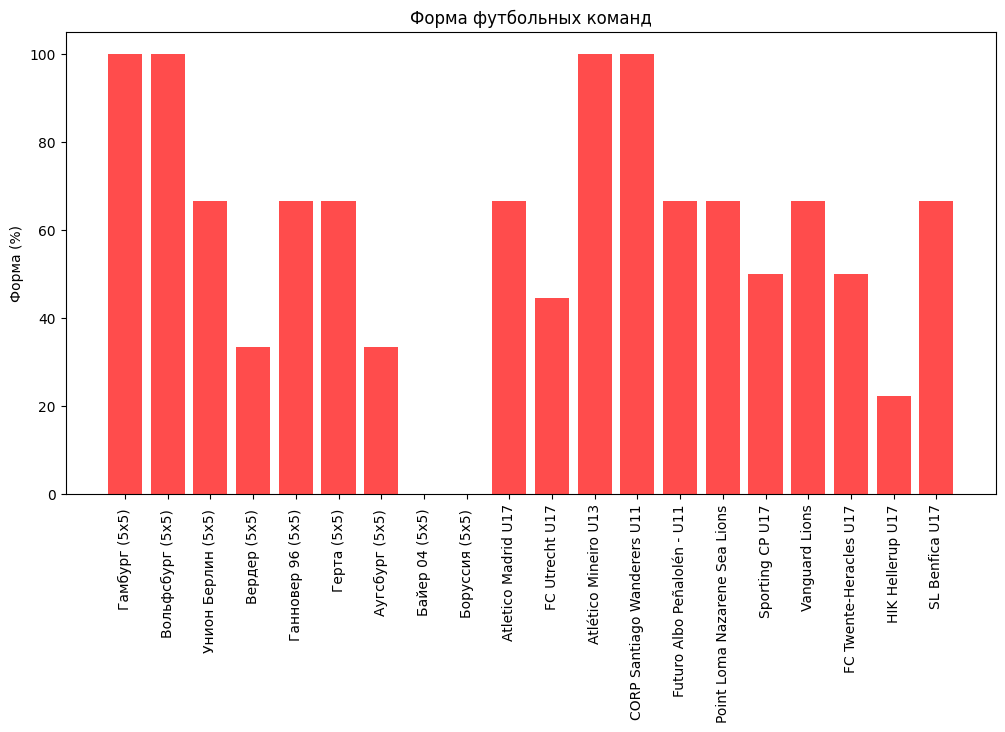

In [ ]:
plt.figure(figsize=(12, 6))
football_teams = team_form[team_form.index.get_level_values('Sport') == 'Футбол'].head(20)
plt.bar(range(len(football_teams)), football_teams['form_%'], color='red', alpha=0.7)
plt.title('Форма футбольных команд')
plt.ylabel('Форма (%)')
plt.xticks(range(len(football_teams)), [team[1] for team in football_teams.index], rotation=90)
plt.show()

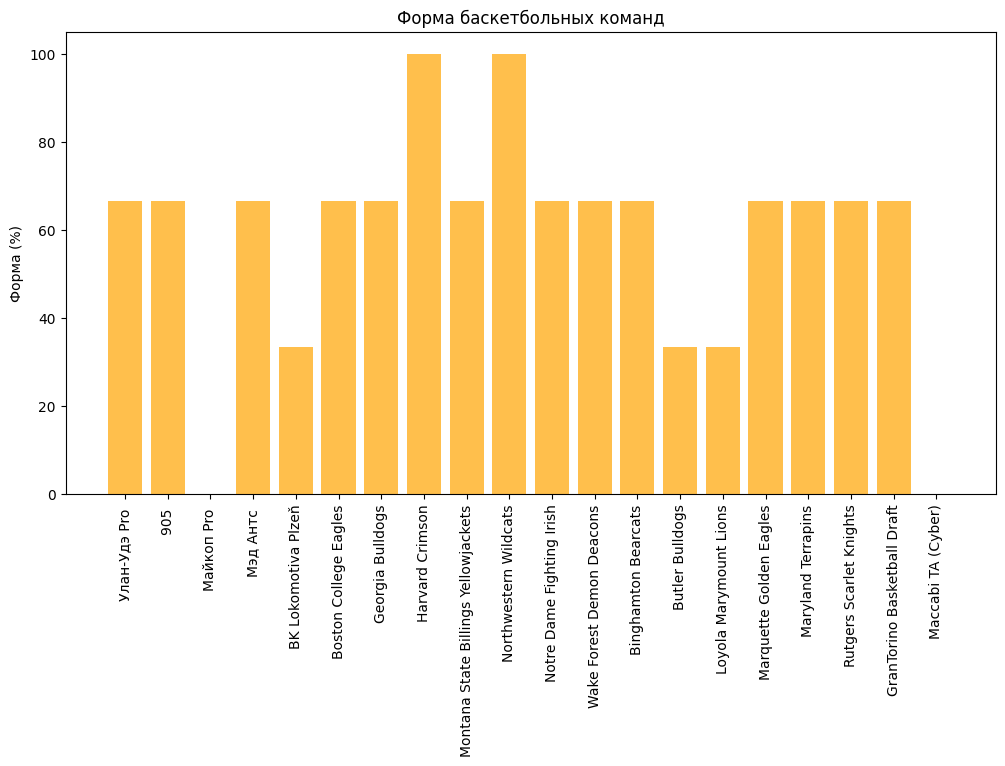

In [ ]:
plt.figure(figsize=(12, 6))
basketball_teams = team_form[team_form.index.get_level_values('Sport') == 'Баскетбол'].head(20)
plt.bar(range(len(basketball_teams)), basketball_teams['form_%'], color='orange', alpha=0.7)
plt.title('Форма баскетбольных команд')
plt.ylabel('Форма (%)')
plt.xticks(range(len(basketball_teams)), [team[1] for team in basketball_teams.index], rotation=90)
plt.show()

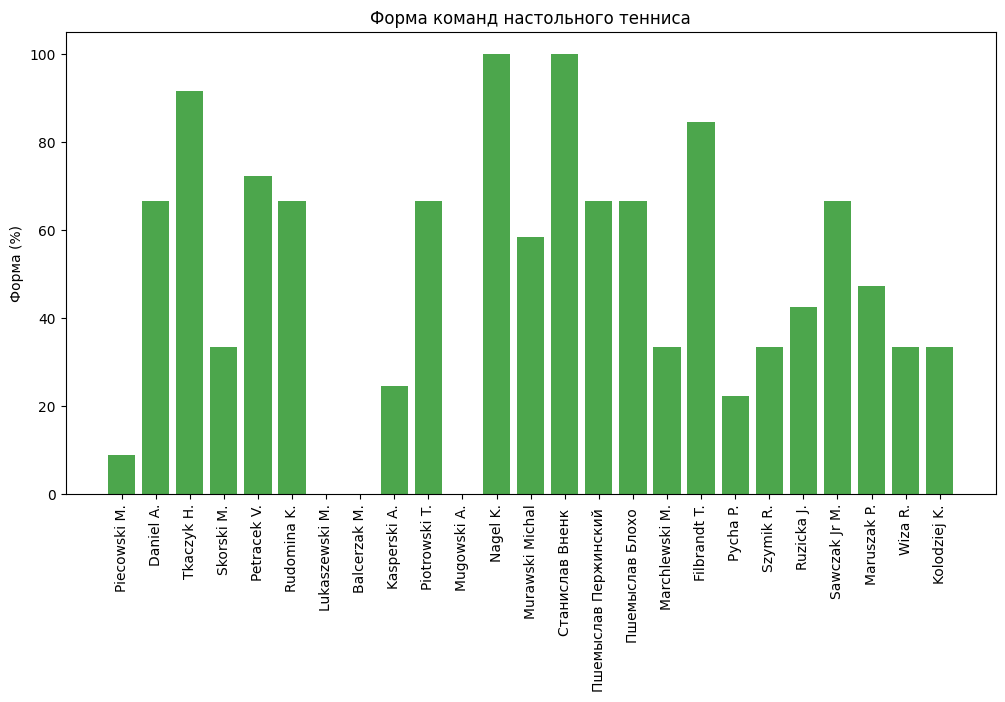

In [ ]:
plt.figure(figsize=(12, 6))
table_tennis_teams = team_form[team_form.index.get_level_values('Sport') == 'Настольный теннис'].head(25)
plt.bar(range(len(table_tennis_teams)), table_tennis_teams['form_%'], color='green', alpha=0.7)
plt.title('Форма команд настольного тенниса')
plt.ylabel('Форма (%)')
plt.xticks(range(len(table_tennis_teams)), [team[1] for team in table_tennis_teams.index], rotation=90)
plt.show()

Лучшие ставки по форме

Футбол: Гамбург, Вольфсбург


Баскетбол:Улан-Удэ Pro, 905
          

Настольный теннис: Piecowski M., Daniel A.
                  

Теннис: Alina Shcherbinina, Filip Cristian Jianu
       

Киберфутбол:Италия (GremlinS), Португалия (Forstovicc27)
            

Хоккей: Черные ангелы, Золотые рыцари
       
       
